In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ch2_values.csv',header=None)
time_per_event_in_s= 1.9980000000000002e-05 
timestep_in_s = 2e-08
timesteps_in_s = np.arange(0,time_per_event_in_s,timestep_in_s)

In [3]:
a = df.values
x = a[4].flatten()
bb = x*(-1.0)

In [4]:
# plt.figure(figsize=(12,5))
# plt.plot(x,'-', lw=1)
# plt.axis([0,1000,-2,0])
# plt.show()

In [5]:
# plt.figure(figsize=(12,5))
# plt.plot(bb,'-', lw=1)
# plt.axis([0,1000,0,2])
# plt.show()

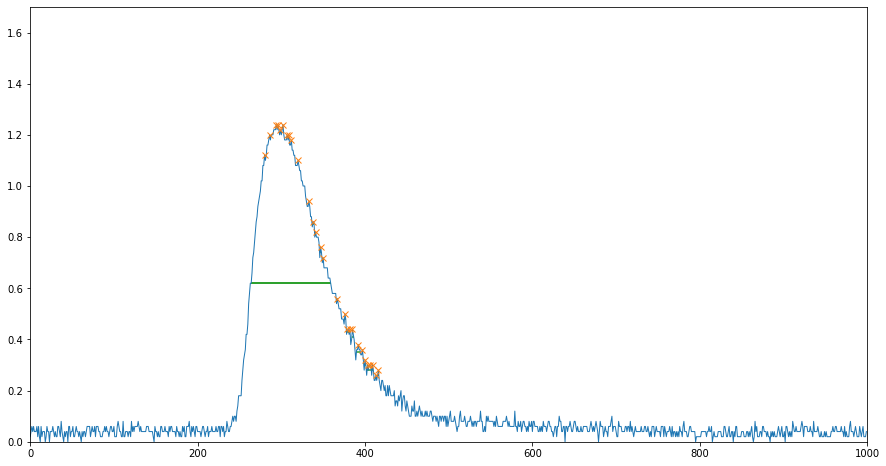

In [9]:
peaks, properties = signal.find_peaks(bb, height=0.25)
results_w = signal.peak_widths(bb, peaks)
plt.figure(figsize=(15,8))
plt.plot(bb,'-', lw=1)
plt.axis([0,1000,0,1.7])
plt.plot(peaks, bb[peaks], "x")
plt.hlines(*results_w[1:], color="C2")
plt.show()

In [11]:
properties

{'peak_heights': array([1.12, 1.2 , 1.24, 1.24, 1.22, 1.24, 1.2 , 1.2 , 1.18, 1.1 , 0.94,
        0.86, 0.82, 0.76, 0.72, 0.56, 0.5 , 0.44, 0.44, 0.44, 0.38, 0.36,
        0.32, 0.3 , 0.3 , 0.3 , 0.26, 0.28])}

In [19]:
results_w[1:][1].max()

415.0

In [21]:
a, b = results_w[1:][1].min(),results_w[1:][1].max()

In [51]:
from scipy.stats import norm
from scipy.special import erf
from scipy.optimize import curve_fit

In [63]:
def fitter(x, mean, sigma, a, b):
    xi = ( x - mean ) / sigma
    alpha = ( a - mean ) / sigma
    beta = ( b - mean ) / sigma
    def Phi(x):
        return 1 / 2 * ( 1 + erf( x / np.sqrt(2) ) ) 
    Zeta = Phi(beta) - Phi(alpha)
    return norm.cdf(x) / ( Zeta * sigma)

def func(x, mean, sigma):
    return np.exp(-(x - mean)**2/(2*sigma**2))/(sigma * np.sqrt(2*np.pi))


In [64]:
x = results_w[1:][1]
y = results_w[1:][0]
param_bounds=([-np.inf,0,-np.inf],[np.inf,0.2,np.inf])

In [65]:
popt, pcov = curve_fit(func, x, y)

In [66]:
popt

array([1., 1.])

In [67]:
pcov

array([[inf, inf],
       [inf, inf]])

In [77]:
func(20,250,0.2)

0.0

In [84]:
np.exp(-(x[0] - 250)**2/(2*0.2**2))/(0.2 * np.sqrt(2*np.pi))

0.0

In [93]:
np.exp(-(x[8] - 250)**2)

0.0

In [91]:
x[8]

311.5